In [1]:
# Load necessary packages
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Load model
from model_baseline import model
from model_sensitivity import model_s


Solve and simulate the model

In [2]:
#This i for the upper envelope illustration
from model_upperenvelope import model_u
#Sigma_epislon is equal to 0.01
t0 = time.time()  # set the starting time
model_u = model_u()
model_u.setup()
model_u.create_grids()
model_u.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

/Users/haraldgrevsen/Dynamic Programming - KU/DynamicprogrammingTermpaper/DynamicprogrammingTermpaper-2/The Model/dc_egm_upperenvelope.py:139: RuntimeWarning: invalid value encountered in power
  return c**(-par.zeta)
/Users/haraldgrevsen/Dynamic Programming - KU/DynamicprogrammingTermpaper/DynamicprogrammingTermpaper-2/The Model/dc_egm_upperenvelope.py:154: RuntimeWarning: invalid value encountered in subtract
  log_sum = mxm + sigma*(np.log(np.sum(np.exp((V - mxm) / sigma),axis=0)))
time: 351.53905 seconds


In [3]:
# for upper envelope
m=model_u.sol.m_raw
c=model_u.sol.c_raw
v=model_u.sol.v_raw

fig_val=[0,0,0,0,0] #diff,t,k,h
for t in range(model_u.par.T-2):
    for k in range(0,model_u.par.Nk):
        for h in range(3):
            if m[t,h,-1,k]>0:
                for i in range(81):
                    if m[t,h,i,k]>m[t,h,i+1,k]:
                        dif=c[t,h,i+1,k]-c[t,h,i,k]
                        if dif<fig_val[0]:
                            fig_val[0]=dif
                            fig_val[1]=t
                            fig_val[2]=k
                            fig_val[3]=h
                            fig_val[4]=i

#print(fig_val)
fig_index=fig_val[1:4]
#print(fig_index)
#print(m[fig_index])
m_max=np.amax(m[fig_val[1],fig_val[3],:,fig_val[2]])
#print(m_max)
print(f't= {fig_val[1]}:.3')
print(f'h= {fig_val[3]}:.3')
print(f'i_k= {fig_val[2]}:.3 thus K= {model_u.par.grid_k[fig_val[2]]:.3}')
m_fig=m[fig_val[1],fig_val[3],:,fig_val[2]]
c_fig=c[fig_val[1],fig_val[3],:,fig_val[2]]
v_fig=v[fig_val[1],fig_val[3],:,fig_val[2]]

t= 58:.3
h= 0:.3
i_k= 94:.3 thus K= 14.1


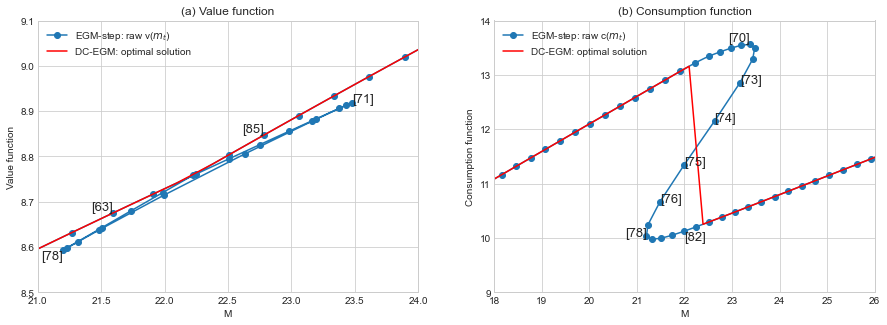

In [4]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
ax.set_title(f'(a) Value function')
plt.xlabel('M')
#plt.ylabel(f"$v_t$ (M,$h_t$ = 0, $k_t$=${model.par.grid_k[81]:.3})$ for t=58")
plt.ylabel(f"Value function")
ax.set_xlim([21,24])
ax.set_ylim([8.5,9.1])
ax.plot(m_fig, v_fig, '-o' , label='EGM-step: raw v($m_t$)')
#ax.plot(m_fig, v_fig, '-o')
ax.plot(model_u.par.grid_m,model_u.sol.v[58,0,:,94] ,'r' , label='DC-EGM: optimal solution' )
ax.annotate([63], (m_fig[63], v_fig[63]), size=13, horizontalalignment='right', verticalalignment='bottom')
ax.annotate([71], (m_fig[71], v_fig[71]), size=13)
ax.annotate([78], (m_fig[78], v_fig[78]), size=13, horizontalalignment='right', verticalalignment='top')
ax.annotate([85], (m_fig[85], v_fig[85]), size=13, horizontalalignment='right', verticalalignment='bottom')
ax.legend()


ax = plt.subplot(1,2,2)
ax.set_title(f'(b) Consumption function')
plt.xlabel('M')
#plt.ylabel('f"$c_t$ (M,$h_t$ = 0, $k_t$=${model.par.grid_k[81]:.3})$ for t=58"')
plt.ylabel(f"Consumption function")
ax.set_xlim([18,26])
ax.set_ylim([9,14])
ax.plot(m_fig, c_fig, '-o', label='EGM-step: raw c($m_t$)')
ax.plot(model_u.par.grid_m,model_u.sol.c[58,0,:,94] ,'r' , label='DC-EGM: optimal solution')
ax.annotate([70], (m_fig[70], c_fig[70]), size=13, horizontalalignment='right', verticalalignment='bottom')
ax.annotate([73], (m_fig[73], c_fig[73]), size=13)
ax.annotate([74], (m_fig[74], c_fig[74]), size=13)
ax.annotate([75], (m_fig[75], c_fig[75]), size=13)
ax.annotate([76], (m_fig[76], c_fig[76]), size=13)
ax.annotate([78], (m_fig[78], c_fig[78]), size=13, horizontalalignment='right')
ax.annotate([82], (m_fig[82], c_fig[82]), size=13, verticalalignment='top')
ax.legend()

plt.show()

In [5]:
from model_baseline import model
#Baseline model
t0 = time.time()  # set the starting time
model = model()
model.setup()
model.create_grids()
model.solve()
model.simulate()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 320.78633 seconds


Policy function plots
1) Consumption functions for different ages
2) Value function for a certain age and human capital level 

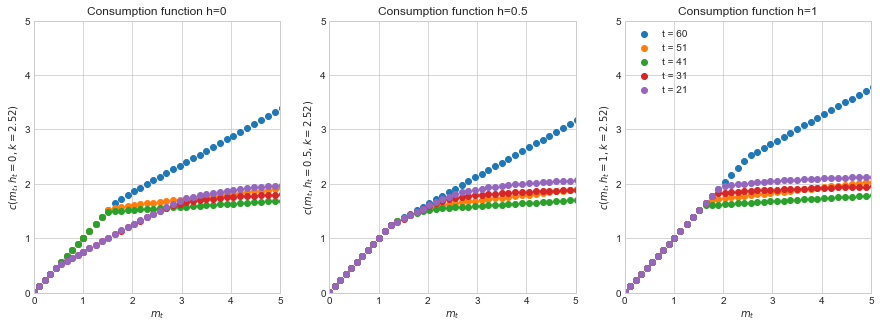

In [6]:
# 1)

ts = [model.par.T-1, model.par.T-10, model.par.T-20, model.par.T-30, model.par.T-40]
i_k = 20
k = model.par.grid_k[i_k]

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,3,1)
for i in ts:
    ax.scatter(model.par.grid_m,model.sol.c[i-1,0,:,i_k], label=f't = {i}')
ax.set_xlabel(f"$m_t$")
ax.set_ylabel(f"$c(m_t,h_{{t}} = 0, k = {k:.3})$")
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_title(f'Consumption function h=0')

ax = fig.add_subplot(1,3,2)
for i in ts:
    ax.scatter(model.par.grid_m,model.sol.c[i-1,1,:,i_k], label=f't = {i}')
ax.set_xlabel(f"$m_t$")
ax.set_ylabel(f"$c(m_t,h_{{t}} = 0.5, k = {k:.3})$")
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_title(f'Consumption function h=0.5')

ax = fig.add_subplot(1,3,3)
for i in ts:
    ax.scatter(model.par.grid_m,model.sol.c[i-1,2,:,i_k], label=f't = {i}')
ax.set_xlabel(f"$m_t$")
ax.set_ylabel(f"$c(m_t,h_{{t}} = 1, k = {k:.3})$")
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_title(f'Consumption function h=1')

plt.legend()
plt.show()

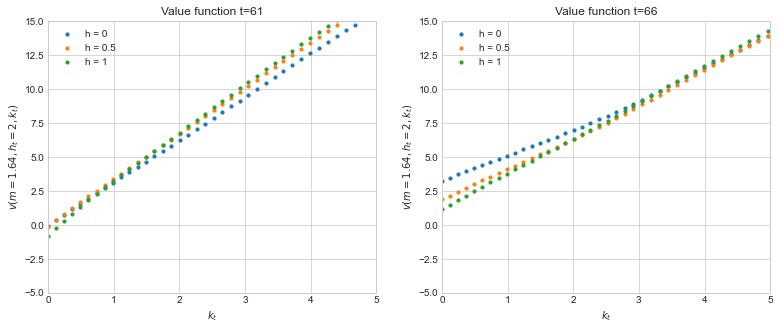

In [7]:
# 2)
t1 = 61
t2 = 66
i_m = 15
m = model.par.grid_m[i_m]
h_list = [0,0.5,1]


fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
for h in range(3):
    ax.scatter(model.par.grid_k,model.sol.v[37,h,i_m,:], label=f'h = {h_list[h]}',s=10)
ax.set_xlabel(f"$k_t$")
ax.set_ylabel(f"$v(m = {m:.3},h_{{t}} = {h}, k_t)$")
ax.set_xlim([0,5])
ax.set_ylim([-5,15])
ax.set_title(f'Value function t={t1}')

plt.legend()


ax = fig.add_subplot(1,3,2)
for h in range(3):
    ax.scatter(model.par.grid_k,model.sol.v[42,h,i_m,:], label=f'h = {h_list[h]}',s=10)
ax.set_xlabel(f"$k_t$")
ax.set_ylabel(f"$v(m = {m:.3},h_{{t}} = {h}, k_t)$")
ax.set_xlim([0,5])
ax.set_ylim([-5,15])
ax.set_title(f'Value function t={t2}')

plt.legend()
plt.show()

Fit of the model - Compare simulated data with aggregated data from Statistics Denmark

In [8]:
# DATA IMPORT
#Participation, erhvervsfrekvens:
t_h = range(26,66)
Data_h = [0.722,0.722,0.722,0.722,0.722,0.785,0.785,0.785,0.785,0.785,0.818,0.818,0.818,0.818,0.818,0.838,0.838,0.838,0.838,0.838,0.839,0.839,0.839,0.839,0.839,0.82,0.82,0.82,0.82,0.82,0.791,0.791,0.791,0.791,0.791,0.655,0.655,0.655,0.655,0.655]

#Wage after tax, disponibel indkomst:
t_w = range(26,81)
Data_disp = [1.85761, 1.85761, 1.85761, 1.85761, 1.85761, 2.45173, 2.45173, 2.45173, 2.45173, 2.45173, 2.84421, 2.84421, 2.84421, 2.84421, 2.84421, 3.16216, 3.16216, 3.16216, 3.16216, 3.16216, 3.33317, 3.33317, 3.33317, 3.33317, 3.33317, 3.33049, 3.33049, 3.33049, 3.33049, 3.33049, 3.1961, 3.1961, 3.1961, 3.1961, 3.1961, 2.95965, 2.95965, 2.95965, 2.95965, 2.95965, 2.43745, 2.43745, 2.43745, 2.43745, 2.43745, 2.28074, 2.28074, 2.28074, 2.28074, 2.28074, 2.14874, 2.14874, 2.14874, 2.14874, 2.14874]

#Cash on hand/assets
t_m = range(26,81)
Data_cash = [2.441, 2.441, 2.441, 2.441, 2.441, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 9.06466, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 14.56911, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 17.01861, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.02451, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253, 18.80253]

In [9]:
def figure_dashboard(par,sim):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(2,2,1)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.m,1), label='Model mean')
    ax.plot(t_m,Data_cash, label='Data', )
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Cash-on-hand $m_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,30])
    ax.legend()
    ax.set_title(f'Average cash on hands')

    ax = fig.add_subplot(2,2,2)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.c,1))
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Consumption $c_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,5])
    ax.legend
    ax.set_title(f'Average consumption')

    ax = fig.add_subplot(2,2,3)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.h,1))
    ax.plot(t_h,Data_h)
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Labour supply $h_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,1])
    ax.legend
    ax.set_title(f'Average hours worked')

    ax = fig.add_subplot(2,2,4)
    ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.disp,1), label='Model mean')
    ax.plot(t_w,Data_disp, label = 'Data')
    ax.set_xlabel(f"age")
    ax.set_ylabel(f"Disposable income, $disp_t$")
    ax.set_xlim([25,80])
    ax.set_ylim([0,5])
    ax.legend()
    ax.set_title(f'Average disposable income')


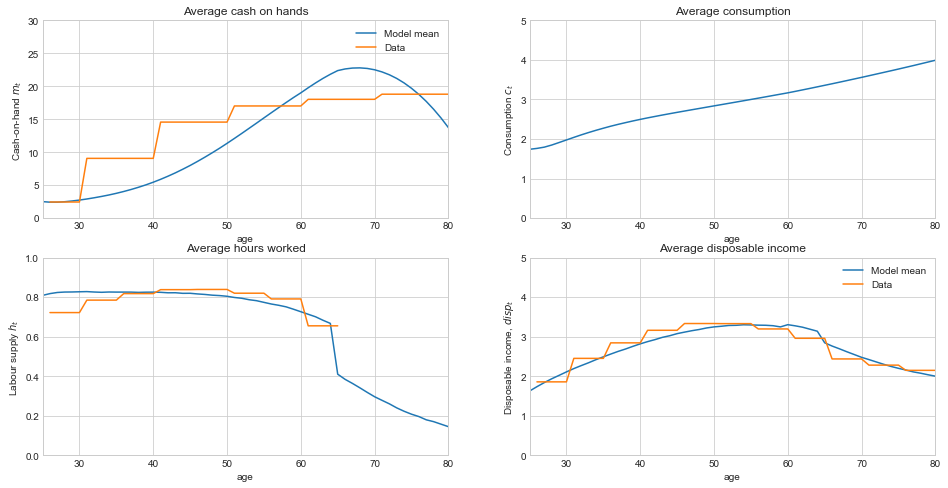

In [10]:
figure_dashboard(model.par,model.sim)

Policy Experiments
1) Increase the age limit for payment of funds from pension schemes
2) Increase the official retirement age

In [11]:
from model_baseline import model as model_to
t0 = time.time()
model_to = model_to()
model_to.setup()
par = model_to.par
par.To = 37
model_to.create_grids()
model_to.solve()
model_to.simulate()
t1 = time.time()
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 545.65152 seconds


Text(0.5, 1.0, 'Average disposable income')

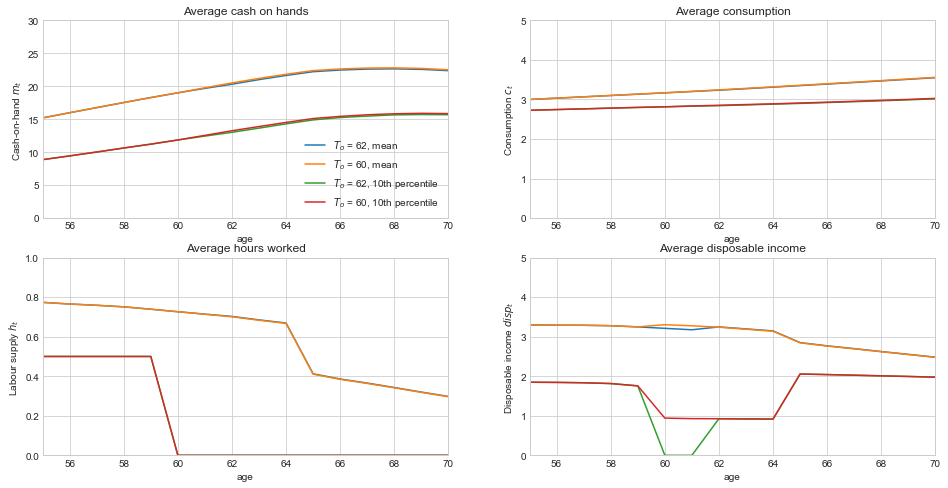

In [12]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(2,2,1)
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model_to.sim.m,1), label=f'$T_o$ = 62, mean')
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model.sim.m,1), label=f'$T_o$ = 60, mean')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_to.sim.m,0.10, axis=1), label=f'$T_o$ = 62, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.10, axis=1), label=f'$T_o$ = 60, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Cash-on-hand $m_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,30])
ax.legend()
ax.set_title(f'Average cash on hands')

ax = fig.add_subplot(2,2,2)
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model_to.sim.c,1), label=f'$T_o$ = 62')
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model.sim.c,1), label=f'$T_o$ = 60')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_to.sim.c,0.10, axis=1), label=f'$T_o$ = 62, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.c,0.10, axis=1), label=f'$T_o$ = 60, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Consumption $c_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,5])
ax.set_title(f'Average consumption')

ax = fig.add_subplot(2,2,3)
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model_to.sim.h,1), label=f'$T_o$ = 62')
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model.sim.h,1), label=f'$T_o$ = 60')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_to.sim.h,0.10, axis=1), label=f'$T_o$ = 62, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.h,0.10, axis=1), label=f'$T_o$ = 60, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Labour supply $h_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,1])
ax.set_title(f'Average hours worked')

ax = fig.add_subplot(2,2,4)
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model_to.sim.disp,1), label=f'$T_o$ = 62')
ax.plot(np.arange(model_to.par.simT)+25,np.mean(model.sim.disp,1), label=f'$T_o$ = 60')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_to.sim.disp,0.10, axis=1), label=f'$T_o$ = 62, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.10, axis=1), label=f'$T_o$ = 60, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Disposable income $disp_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,5])
ax.set_title(f'Average disposable income')

In [13]:
from model_baseline import model as model_tp
t0 = time.time()
model_tp = model_tp()
model_tp.setup()
par = model_tp.par
par.Tp = 42
model_tp.create_grids()
model_tp.solve()
model_tp.simulate()
t1 = time.time()
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 512.33741 seconds


Text(0.5, 1.0, 'Average disposable income')

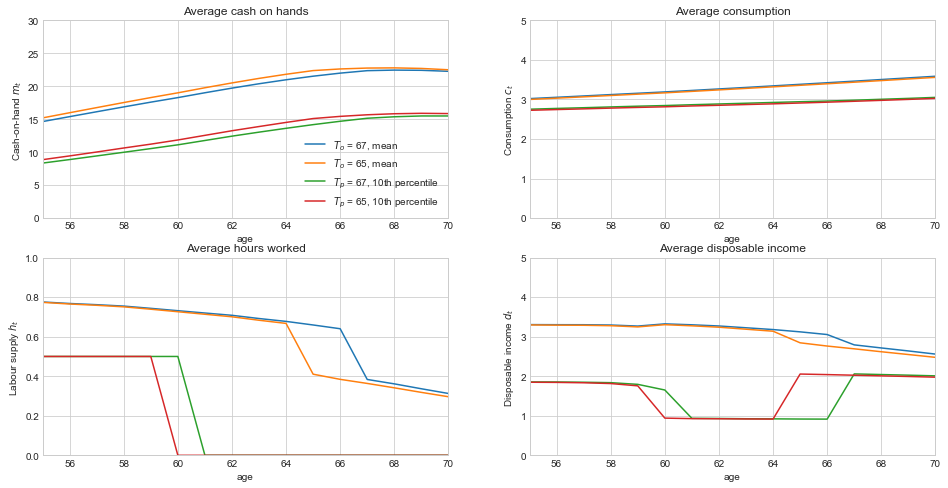

In [14]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(2,2,1)
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model_tp.sim.m,1), label=f'$T_o$ = 67, mean')
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model.sim.m,1), label=f'$T_o$ = 65, mean')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_tp.sim.m,0.10, axis=1), label=f'$T_p$ = 67, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.m,0.10, axis=1), label=f'$T_p$ = 65, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Cash-on-hand $m_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,30])
ax.legend()
ax.set_title(f'Average cash on hands')

ax = fig.add_subplot(2,2,2)
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model_tp.sim.c,1), label=f'$T_o$ = 67')
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model.sim.c,1), label=f'$T_o$ = 65')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_tp.sim.c,0.10, axis=1), label=f'$T_p$ = 67, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.c,0.10, axis=1), label=f'$T_p$ = 65, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Consumption $c_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,5])
ax.set_title(f'Average consumption')

ax = fig.add_subplot(2,2,3)
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model_tp.sim.h,1), label=f'$T_o$ = 67')
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model.sim.h,1), label=f'$T_o$ = 65')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_tp.sim.h,0.10, axis=1), label=f'$T_p$ = 67, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.h,0.10, axis=1), label=f'$T_p$ = 65, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Labour supply $h_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,1])
ax.set_title(f'Average hours worked')

ax = fig.add_subplot(2,2,4)
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model_tp.sim.disp,1), label=f'$T_o$ = 67')
ax.plot(np.arange(model_tp.par.simT)+25,np.mean(model.sim.disp,1), label=f'$T_o$ = 65')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model_tp.sim.disp,0.10, axis=1), label=f'$T_p$ = 67, 10th percentile')
ax.plot(np.arange(model.par.simT)+25,np.quantile(model.sim.disp,0.10, axis=1), label=f'$T_p$ = 65, 10th percentile')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Disposable income $d_t$")
ax.set_xlim([55,70])
ax.set_ylim([0,5])
ax.set_title(f'Average disposable income')

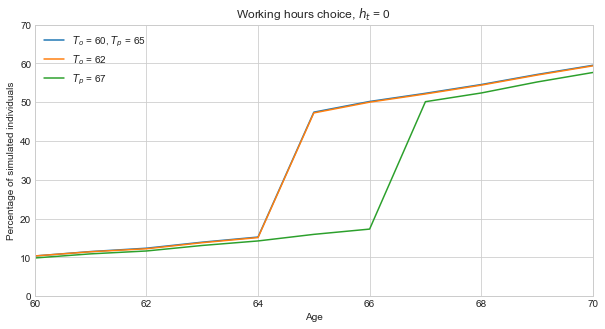

In [15]:
shape_p = (model_to.par.simT, 1)
h0_baseline = np.nan + np.zeros(shape_p)
h0_to = np.nan + np.zeros(shape_p)
h0_tp = np.nan + np.zeros(shape_p)
for t in range(model_to.par.simT):
    h0_baseline[t] = np.mean(model.sim.h[t] == np.zeros((1, model.par.simN)))
    h0_to[t] = np.mean(model_to.sim.h[t] == np.zeros((1, model.par.simN)))
    h0_tp[t] = np.mean(model_tp.sim.h[t] == np.zeros((1, model.par.simN)))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(model.par.simT)+25 ,h0_baseline*100, label=f'$T_o$ = 60, $T_p$ = 65')
ax.plot(np.arange(model.par.simT)+25 ,h0_to*100, label=f'$T_o$ = 62')
ax.plot(np.arange(model.par.simT)+25 ,h0_tp*100, label=f'$T_p$ = 67')
ax.set_xlim([60,70])
ax.set_ylim([0,70])
ax.set_xlabel(f"Age")
ax.set_ylabel(f"Percentage of simulated individuals")
ax.set_title(f'Working hours choice, $h_t$ = 0')
plt.legend()

In [16]:
t0 = time.time()
model_s = model_s()
model_s.setup()
model_s.create_grids()
model_s.solve()
model_s.simulate()
t1 = time.time() 
print(f'time: {t1-t0:.8} seconds') # print the total time

time: 807.73198 seconds


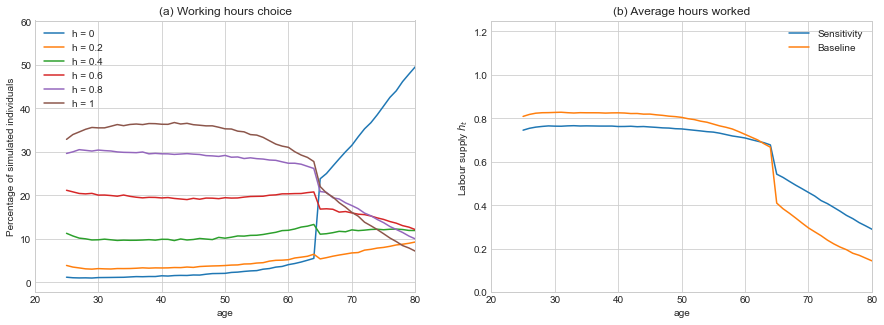

In [17]:
shape = (model_s.par.simT, 1)
h0 = np.nan + np.zeros(shape)
h1 = np.nan + np.zeros(shape)
h2 = np.nan + np.zeros(shape)
h3 = np.nan + np.zeros(shape)
h4 = np.nan + np.zeros(shape)
h5 = np.nan + np.zeros(shape)


for t in range(model_s.par.simT):
    h0[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)))
    h1[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)) + model_s.par.hlist[1])
    h2[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)) + model_s.par.hlist[2])
    h3[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)) + model_s.par.hlist[3])
    h4[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)) + model_s.par.hlist[4])
    h5[t] = np.mean(model_s.sim.h[t] == np.zeros((1, model_s.par.simN)) + model_s.par.hlist[5])


    
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(model_s.par.simT)+25 ,h0*100, label=f'h = {model_s.par.hlist[0]}')
ax.plot(np.arange(model_s.par.simT)+25 ,h1*100, label=f'h = {model_s.par.hlist[1]}')
ax.plot(np.arange(model_s.par.simT)+25 ,h2*100, label=f'h = {model_s.par.hlist[2]}')
ax.plot(np.arange(model_s.par.simT)+25 ,h3*100, label=f'h = {model_s.par.hlist[3]}')
ax.plot(np.arange(model_s.par.simT)+25 ,h4*100, label=f'h = {model_s.par.hlist[4]}')
ax.plot(np.arange(model_s.par.simT)+25 ,h5*100, label=f'h = {model_s.par.hlist[5]}')
ax.set_xlim([20,80])
ax.set_xlabel(f"age")
ax.set_ylabel(f"Percentage of simulated individuals")
ax.set_title(f'(a) Working hours choice')
plt.legend()

ax = fig.add_subplot(1,2,2)
ax.plot(np.arange(model_s.par.simT)+25,np.mean(model_s.sim.h,1), label='Sensitivity')
ax.plot(np.arange(model.par.simT)+25,np.mean(model.sim.h,1), label = 'Baseline')
ax.set_xlabel(f"age")
ax.set_ylabel(f"Labour supply $h_t$")
ax.set_xlim([20,80])
ax.set_ylim([0,1.25])
ax.legend
ax.set_title(f'(b) Average hours worked')
plt.legend()


plt.show()